In [18]:
import pandas as pd
import numpy as np
import pickle
from ta.volatility import BollingerBands
import matplotlib.pyplot as plt
import os
import sys

from config import BASE_DIR
print(os.getcwd())
os.chdir(BASE_DIR)
print(BASE_DIR)
import scripts.functions as fn

from scripts.indicators import find_pivots,donchian

C:\Users\lbisa\Dropbox\Cripto\python\InvestingEvolution\ie\www
C:\Users\lbisa\Dropbox\Cripto\python\InvestingEvolution\ie\www


In [19]:
#klines_file =  './backtest/klines/2d01/Completo_BTCUSDT_2d01_2021-01-01_2023-07-31.DataFrame'
klines_file = './backtest/klines/2d01/Lateral_BTCUSDT_2d01_2023-06-20_2023-10-09.DataFrame'
#klines_file = './backtest/klines/1h01/Completo_BTCUSDT_1h01_2021-01-01_2023-07-31.DataFrame'
#klines_file = './backtest/klines/0m15/Completo_XRPUSDT_0m15_2021-01-01_2023-07-31.DataFrame'
#klines_file = './backtest/klines/0m01/Completo_BTCUSDT_0m01_2021-01-01_2023-07-31.DataFrame'

with open(klines_file, 'rb') as file:
    df = pickle.load(file)


In [20]:
def perc_pend(y):
    ln = len(y)
    base = y[0]
    py = (y/base)*100
    pend = fn.pendiente(py)
    return pend



class Strategy:
       
    def signal(self,df):
        
        # Pivots
        df['ma'] = df['close'].rolling(window=21).mean()
        
         
        df = find_pivots(df, dev_threshold = 3.0)
        
        df['compra'] = (df['close'] < df['ma']) & (df['min_pivot'] > 0)
        df['venta']  = (df['close'] > df['ma']) & (df['max_pivot'] > 0)

        df['signal'] = np.where(df['compra'], 'COMPRA', 'NEUTRO')
        df['signal'] = np.where(df['venta'], 'VENTA',df['signal'])


        """ 
        df = donchian(df)
        df['dch_amp'] = df['dch_max'] - df['dch_min']
        df['compra'] = (df['close'] < df['dch_mean']) & (df['dch_max'] == df['dch_max'].shift(3)) & (df['dch_amp'].shift(2) > df['dch_amp'].shift(3))
        df['venta']  = (df['close'] > df['dch_mean']) & (df['dch_amp'] == df['dch_amp'].shift(3)) & (df['dch_amp'].shift(2) > df['dch_amp'].shift(3))

        df['signal'] = np.where(df['compra'], 'COMPRA', 'NEUTRO')
        df['signal'] = np.where(df['venta'], 'VENTA',df['signal'])

        df['buy_price']  = np.where(df['compra'],df['close'],None)
        df['sell_price'] = np.where(df['venta'],df['close'],None)
        """
        return df


" \ndf[['close','dch_mean','dch_max','dch_min','buy_price','sell_price']].plot(figsize=(20,6),style=['#aaaaaa','#dddddd','r-^','g-v','g-o','r-o'])\n"

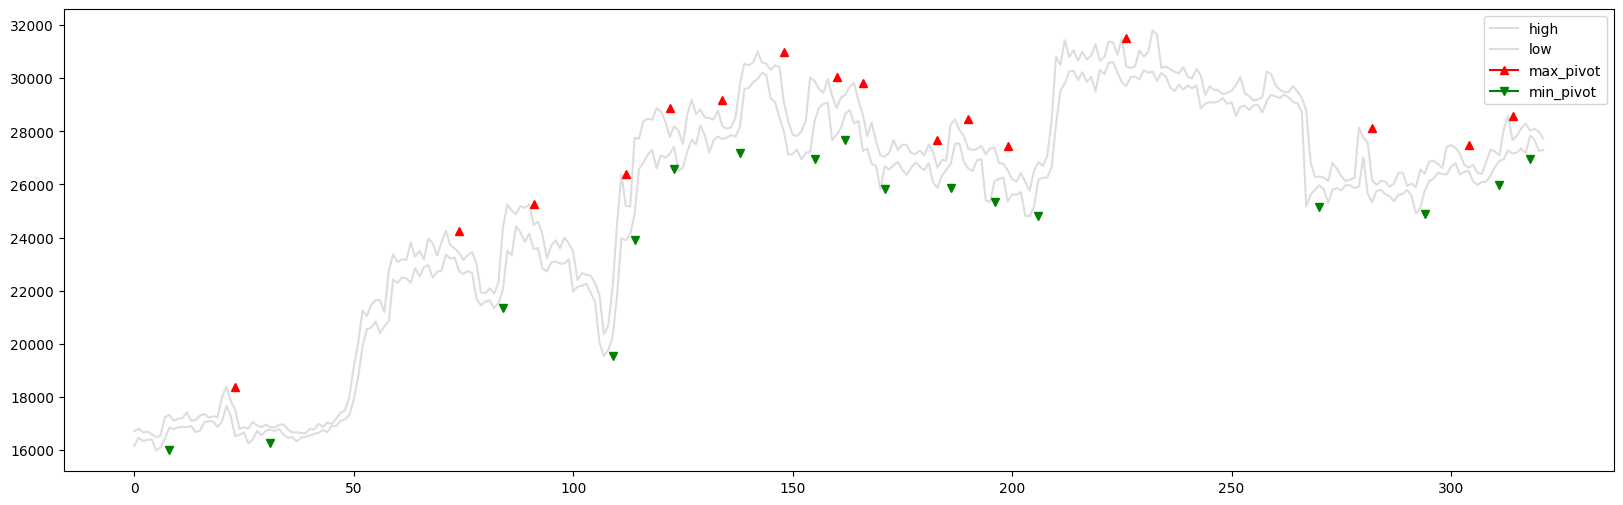

In [21]:

# Aplicar la función signal
df = Strategy().signal(df)

#Pivots
df['buy_price']  = None#np.where(df['compra'],df['close'],None)
df['sell_price'] = None#np.where(df['venta'],df['close'],None)
df[['high','low','max_pivot','min_pivot','buy_price','sell_price']].plot(figsize=(20,6),style=['#dddddd','#dddddd','r-^','g-v','g-o','r-o'])
""" 
df[['close','dch_mean','dch_max','dch_min','buy_price','sell_price']].plot(figsize=(20,6),style=['#aaaaaa','#dddddd','r-^','g-v','g-o','r-o'])
"""


In [22]:
def next(row):
    pass

data = df[['datetime','open','low','high','close','volume','signal']].loc[0:5]

events = data['datetime'].copy()
pre_signal = 'NEUTRO' 
velas = data['datetime'].count()
print(f'Procesando ',end="\r")
for row in data.itertuples():
    next(row)
    pre_signal = 'NEUTRO' 
data['datetime'].count()

json_data = data.to_json(orient='records')
print(json_data)

[{"datetime":1669161600000,"open":16227.96,"low":16160.2,"high":16706.0,"close":16603.11,"volume":264927.70408,"signal":"NEUTRO"},{"datetime":1669248000000,"open":16603.11,"low":16458.05,"high":16812.63,"close":16598.95,"volume":206565.92346,"signal":"NEUTRO"},{"datetime":1669334400000,"open":16599.55,"low":16342.81,"high":16666.0,"close":16522.14,"volume":182089.49533,"signal":"NEUTRO"},{"datetime":1669420800000,"open":16521.35,"low":16385.0,"high":16701.99,"close":16458.57,"volume":181804.81666,"signal":"NEUTRO"},{"datetime":1669507200000,"open":16457.61,"low":16401.0,"high":16600.0,"close":16428.78,"volume":162025.47607,"signal":"NEUTRO"},{"datetime":1669593600000,"open":16428.77,"low":15995.27,"high":16487.04,"close":16212.91,"volume":252695.40367,"signal":"NEUTRO"}]


In [23]:
def calculate_pos(quote, qty_pos, mult):
        pos = []
        for i in range(qty_pos):
            pos_amount = quote * (1 - (1 / mult)) / (1 - 1 / mult**(qty_pos - i))
            pos.append(round(pos_amount, 2))
            quote -= pos_amount
        return pos[::-1]  # Invertir la lista

# Ejemplo de uso
capital = 3100
num_posiciones = 5  
multiplicador = 2.0

importes_posiciones = calculate_pos(capital, num_posiciones, multiplicador)

total_acumulado = 0

for i, importe in enumerate(importes_posiciones, start=1):
    total_acumulado += importe
    print(f'Posición {i}\tUSD {importe}\tTotal acumulado: USD {total_acumulado}')


Posición 1	USD 100.0	Total acumulado: USD 100.0
Posición 2	USD 200.0	Total acumulado: USD 300.0
Posición 3	USD 400.0	Total acumulado: USD 700.0
Posición 4	USD 800.0	Total acumulado: USD 1500.0
Posición 5	USD 1600.0	Total acumulado: USD 3100.0


In [36]:
df['perc_pend'] = 0
for i in range(len(df)):
    if i<3:
        print(i)
        df.loc[i, 'perc_pend'] = 0
    else:
        
        last_3_values = [df.iloc[i-2]['ma'],df.iloc[i-1]['ma'],df.iloc[i]['ma']]
        print(last_3_values)

        # Aplicar la función perc_pend
        pend = perc_pend(last_3_values)

        # Agregar la columna de pendiente
        df.loc[i, 'perc_pend'] = pend

0
1
2
[nan, nan, nan]


TypeError: 'numpy.float64' object is not callable